In [24]:
import pandas as pnd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

# TV, halftime shows, and the Big Game¶

In [15]:
tv_data=pnd.read_csv('tv.csv')
halftime_musicians_data=pnd.read_csv('halftime_musicians.csv')
super_bowls_data=pnd.read_csv('super_bowls.csv')

#Display
display(tv_data.head())
display(halftime_musicians_data.head())
display(super_bowls_data.head())

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


# Taking note of dataset issues

In [19]:
display(super_bowls_data.info())
display(tv_data.info())
display(halftime_musicians_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


None

# Combined points distribution

In [34]:
display(super_bowls_data[super_bowls_data['combined_pts']>70])
display(super_bowls_data[super_bowls_data['combined_pts']>25])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
5,2013-02-03,47,Mercedes-Benz Superdome,New Orleans,Louisiana,71024,Baltimore Ravens,34,Joe Flacco,NaN,John Harbaugh,San Francisco 49ers,31,Colin Kaepernick,NaN,Jim Harbaugh,65,3
6,2012-02-05,46,Lucas Oil Stadium,Indianapolis,Indiana,68658,New York Giants,21,Eli Manning,NaN,Tom Coughlin,New England Patriots,17,Tom Brady,NaN,Bill Belichick,38,4
7,2011-02-06,45,Cowboys Stadium,Arlington,Texas,103219,Green Bay Packers,31,Aaron Rodgers,NaN,Mike McCarthy,Pittsburgh Steelers,25,Ben Roethlisberger,NaN,Mike Tomlin,56,6
8,2010-02-07,44,Sun Life Stadium,Miami Gardens,Florida,74059,New Orleans Saints,31,Drew Brees,NaN,Sean Payton,Indianapolis Colts,17,Peyton Manning,NaN,Jim Caldwell,48,14
9,2009-02-01,43,Raymond James Stadium,Tampa,Florida,70774,Pittsburgh Steelers,27,Ben Roethlisberger,NaN,Mike Tomlin,Arizona Cardinals,23,Kurt Warner,NaN,Ken Whisenhunt,50,4


<AxesSubplot:xlabel='combined_pts', ylabel='Count'>

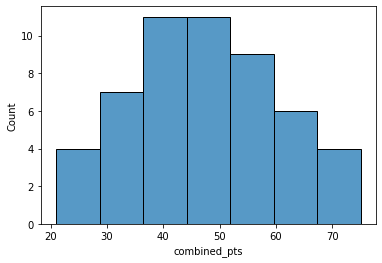

In [35]:

sns.histplot(super_bowls_data['combined_pts'])


# Point difference distribution